## Cálculo do Retorno de uma Carteira de Ações


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

Definição dos ativos financeiros e seus pesos (%) nas carteiras Brasileira e Americana.

In [2]:
br_tickers_n_weights = (
    ("WEGE3.SA", 0.0714),
    ("ARZZ3.SA", 0.0250),
    ("LREN3.SA", 0.0250),
    ("GRND3.SA", 0.0250),
    ("LEVE3.SA", 0.0250),
    ("ABEV3.SA", 0.0500),
    ("MDIA3.SA", 0.0500),
    ("SLCE3.SA", 0.0500),
    ("PSSA3.SA", 0.0714),
    ("B3SA3.SA", 0.0500),
    ("ITUB3.SA", 0.0714),
    ("BBAS3.SA", 0.0714),
    ("RADL3.SA", 0.0500),
    ("ODPV3.SA", 0.0250),
    ("FLRY3.SA", 0.0250),
    ("HYPE3.SA", 0.0250),
    ("VIVT3.SA", 0.0500),
    ("SAPR3.SA", 0.0250),
    ("CPFE3.SA", 0.0714),
    ("EGIE3.SA", 0.0714),
    ("EQTL3.SA", 0.0714),
)

usa_tickers_n_weights = (
    ("AAPL", 0.0434782608695652),
    ("PG", 0.0434782608695652),
    ("NKE", 0.0434782608695652),
    ("BLK", 0.0434782608695652),
    ("JPM", 0.0434782608695652),
    ("JNJ", 0.0434782608695652),
    ("WST", 0.0434782608695652),
    ("UNH", 0.0434782608695652),
    ("MMM", 0.0434782608695652),
    ("TTC", 0.0434782608695652),
    ("DIS", 0.0434782608695652),
    ("ROST", 0.0434782608695652),
    ("COST", 0.0434782608695652),
    ("HD", 0.0434782608695652),
    ("EXPD", 0.0434782608695652),
    ("PAYX", 0.0434782608695652),
    ("FAST", 0.0434782608695652),
    ("GOOGL", 0.0434782608695652),
    ("TXN", 0.0434782608695652),
    ("ADBE", 0.0434782608695652),
    ("ANSS", 0.0434782608695652),
    ("ACN", 0.0434782608695652),
    ("MSFT", 0.0434782608695652),
)

usa_etf_tickers_n_weights = (
    ("VOO", 0.3000),
    ("TLT", 0.4000),
    ("IEF", 0.1500),
    # ("IBIT", 0.0750),
    # ("GLD", 0.07500),
)

br_index_ticker = "^BVSP"

usa_index_ticker = "^GSPC"

Download dos dados dos ativos financeiros a partir do Yahoo Finance a partir de 02/02/2011.

In [3]:
br_stock_data = pd.DataFrame()

usa_stock_data = pd.DataFrame()
usa_etf_stock_data = pd.DataFrame()

br_index_data = pd.DataFrame()
usa_index_data = pd.DataFrame()

start_date: str = f"{datetime.now().year - 1}-{datetime.now().month}-{datetime.now().day}"
end_date: str = datetime.now().strftime("%Y-%m-%d")

for t in br_tickers_n_weights:
    ticker: str = t[0]
    br_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

for t in usa_tickers_n_weights:
    ticker: str = t[0]
    usa_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

for t in usa_etf_tickers_n_weights:
    ticker: str = t[0]
    usa_etf_stock_data[ticker]: dict = yf.download(
        ticker, progress=False, start=start_date, end=end_date
    )["Adj Close"]

br_index_data[br_index_ticker]: dict = yf.download(
    br_index_ticker, progress=False, start=start_date, end=end_date
)["Adj Close"]

usa_index_data[usa_index_ticker]: dict = yf.download(
    usa_index_ticker,
    progress=False,
    start=start_date,
    end=end_date,
)["Adj Close"]

# usa_etf_stock_data["IBIT"].fillna(22.950001, inplace=True)

---


### Gráficos

Gráfico Normalizado das Ações Brasileiras:

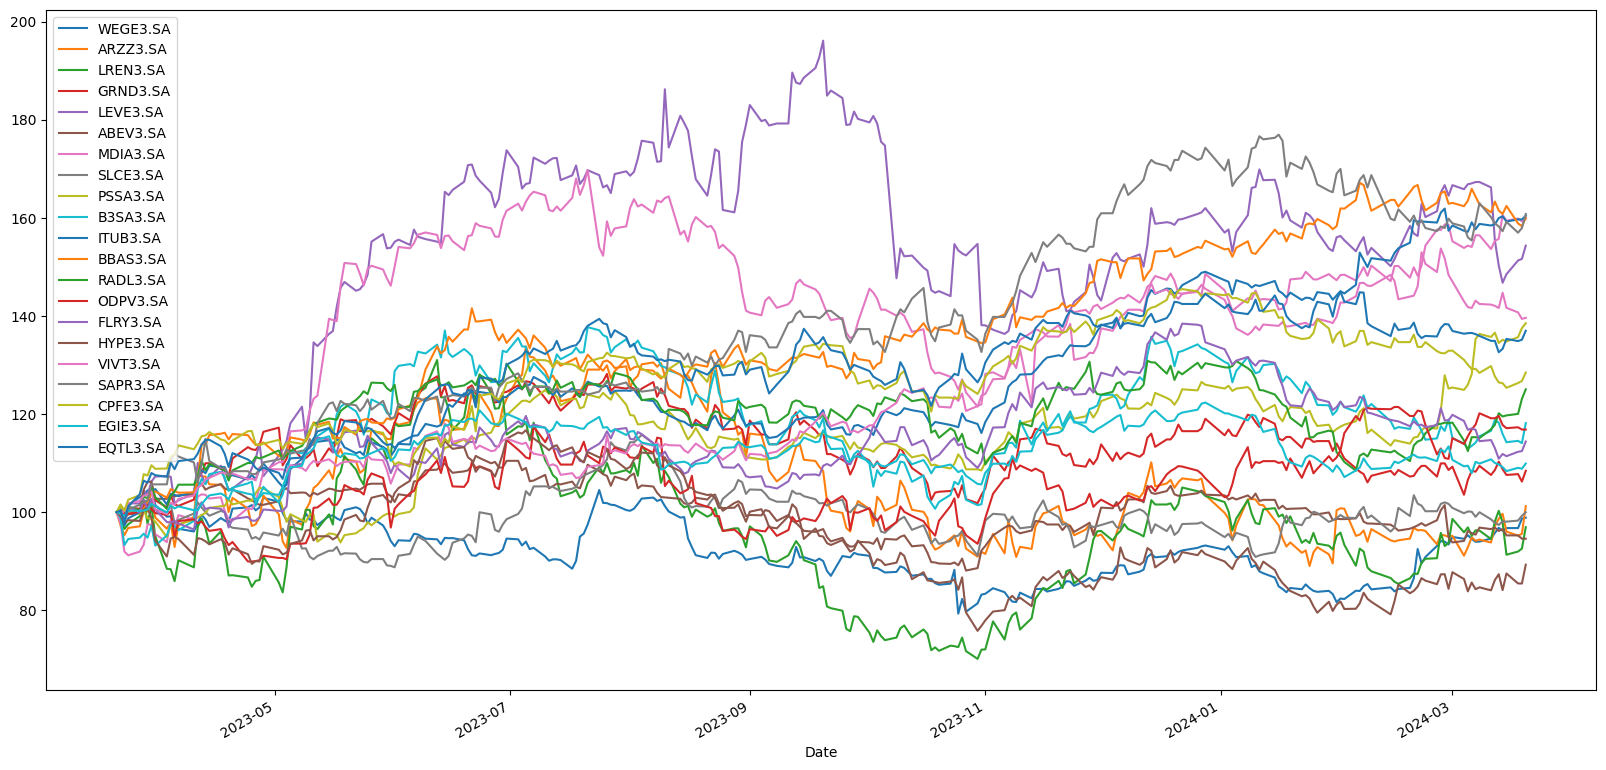

In [4]:
(br_stock_data / br_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Brasileiro:

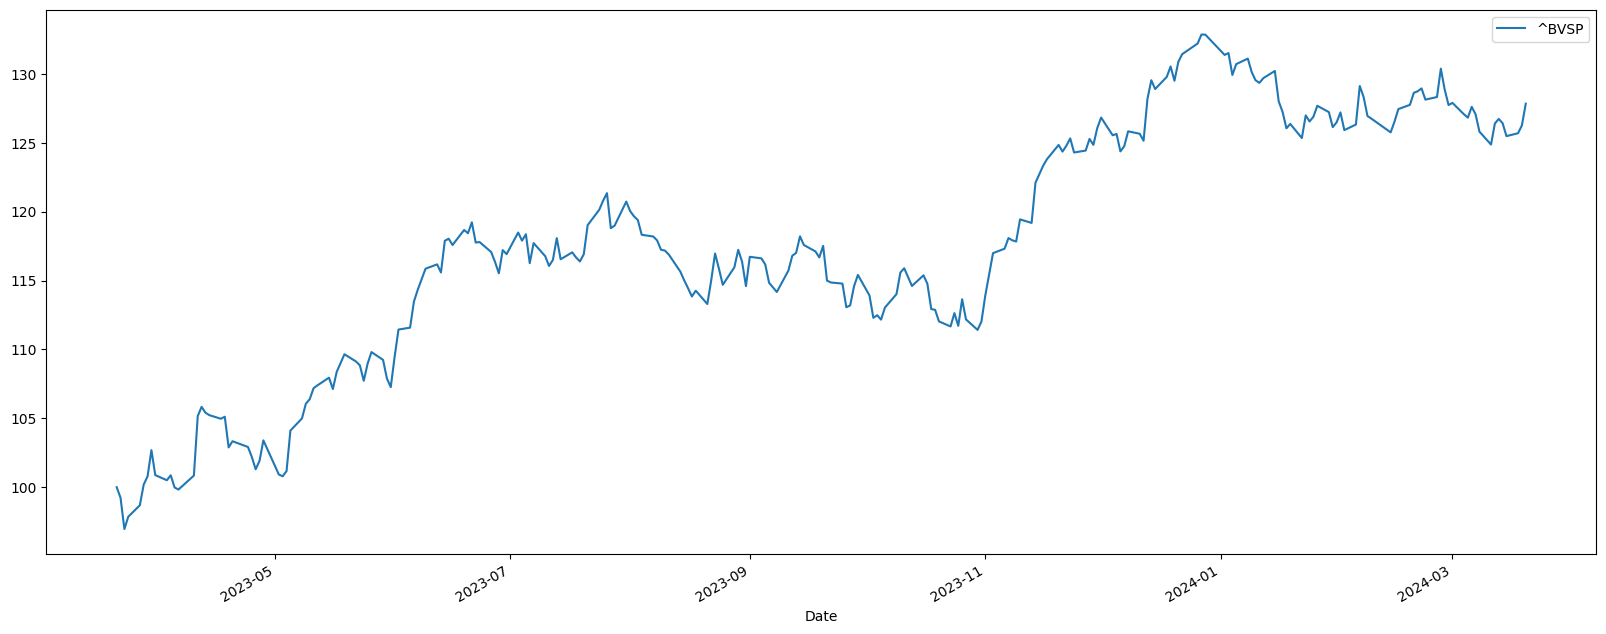

In [5]:
(br_index_data / br_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

Gráfico Normalizado das Ações Americanas:

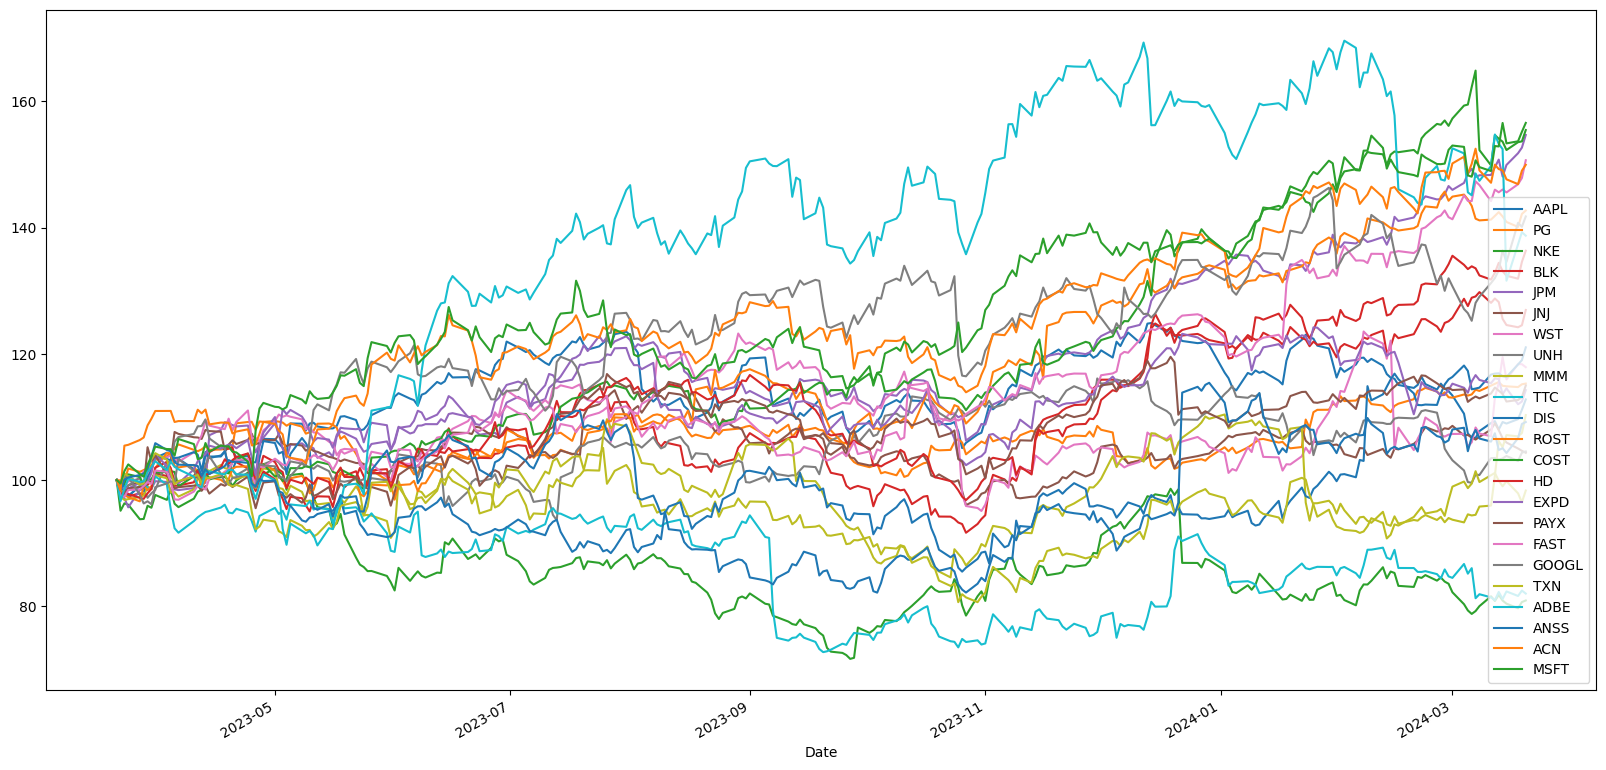

In [6]:
(usa_stock_data / usa_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado dos ETFs Americanos:

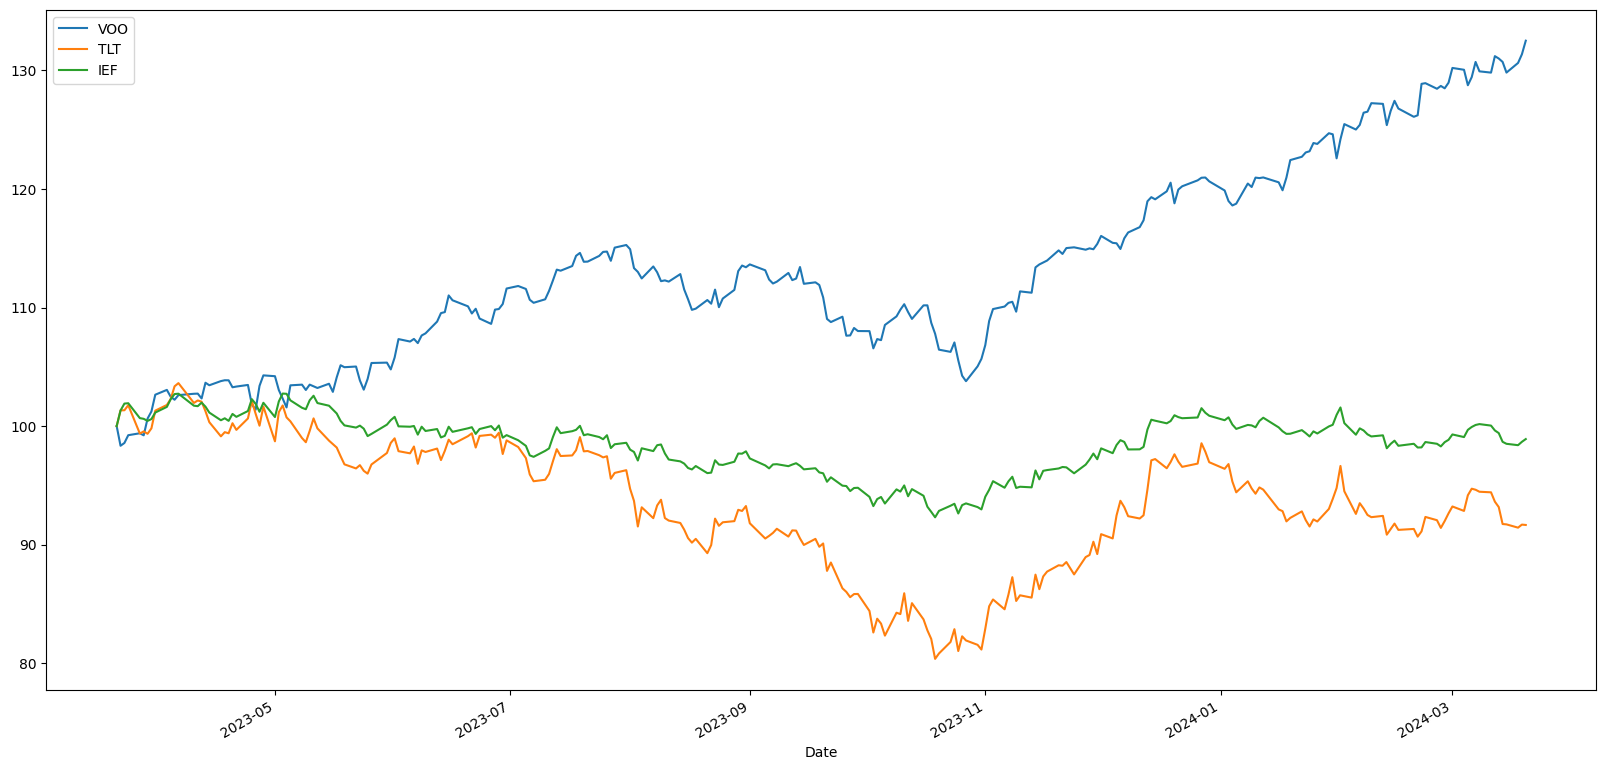

In [7]:
(usa_etf_stock_data / usa_etf_stock_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

Gráfico Normalizado do Índice Americano:

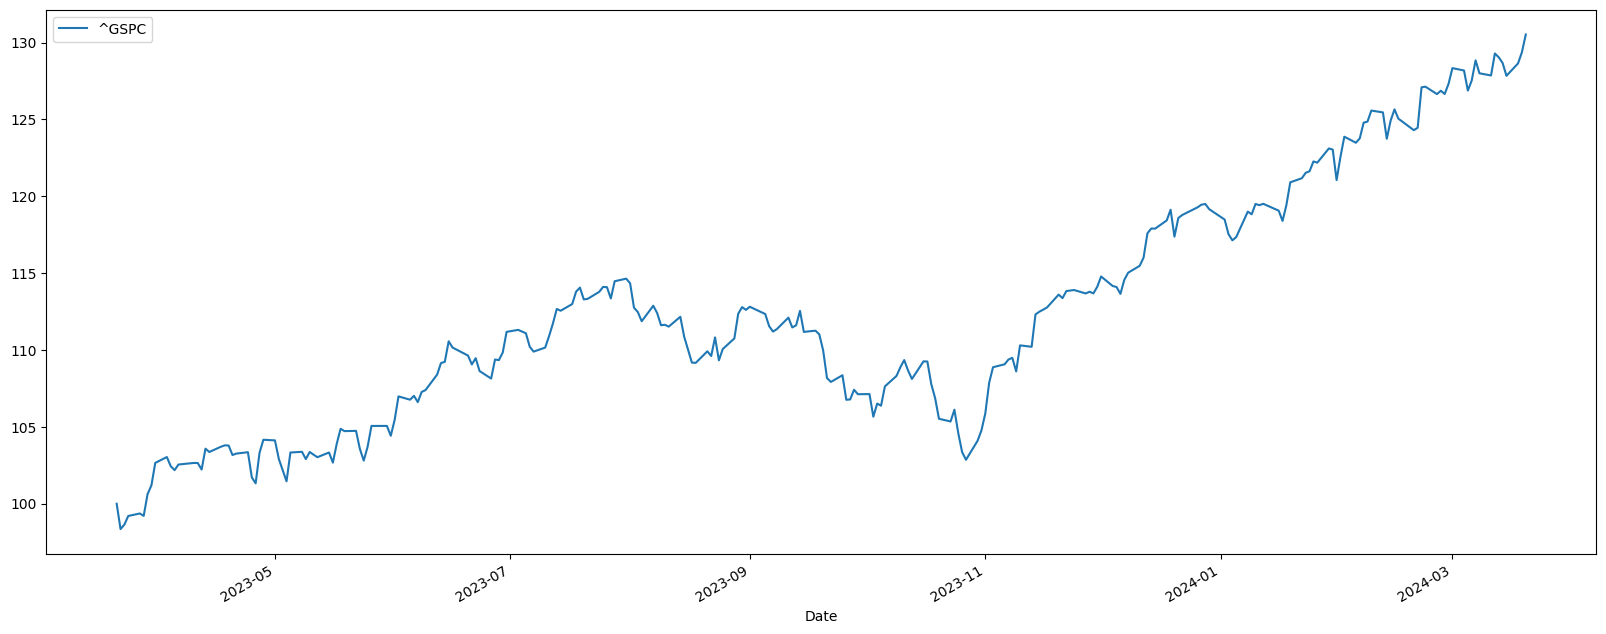

In [8]:
(usa_index_data / usa_index_data.iloc[0] * 100).plot(figsize=(20, 8))
plt.show()

---


### Calculando o Retorno Médio de uma Carteira de Ações


Calcular o retorno simples dos ativos financeiros da carteira e armazenar os resultados em uma nova tabela.


In [9]:
br_index_returns = (br_index_data / br_index_data.shift(1)) - 1
br_stock_returns = (br_stock_data / br_stock_data.shift(1)) - 1

usa_index_returns = (usa_index_data / usa_index_data.shift(1)) - 1
usa_stock_returns = (usa_stock_data / usa_stock_data.shift(1)) - 1
usa_etf_returns = (usa_etf_stock_data / usa_etf_stock_data.shift(1)) - 1

Armazenar os pesos dos ativos financeiros das carteiras para que se possa calcular o produto escalar dos retornos anuais com seus respectivos pesos.


In [10]:
br_weights = np.array([tw[1] for tw in br_tickers_n_weights])
usa_weights = np.array([tw[1] for tw in usa_tickers_n_weights])
usa_etf_weights = np.array([tw[1] for tw in usa_etf_tickers_n_weights])

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Brasileira.

In [11]:
br_index_annual_returns = br_index_returns.mean() * 250
br_stock_annual_returns = br_stock_returns.mean() * 250
br_stock_annual_returns

WEGE3.SA    0.021380
ARZZ3.SA    0.100713
LREN3.SA    0.076749
GRND3.SA    0.118628
LEVE3.SA    0.526814
ABEV3.SA   -0.037079
MDIA3.SA    0.528033
SLCE3.SA    0.032568
PSSA3.SA    0.353410
B3SA3.SA    0.219163
ITUB3.SA    0.492385
BBAS3.SA    0.496994
RADL3.SA    0.251282
ODPV3.SA    0.210244
FLRY3.SA    0.165142
HYPE3.SA   -0.067327
VIVT3.SA    0.355996
SAPR3.SA    0.511238
CPFE3.SA    0.272086
EGIE3.SA    0.108416
EQTL3.SA    0.338690
dtype: float64

Calcular e exibir a rentabilidade média anual de cada ativo financeiro da carteira Americana.

In [12]:
usa_index_annual_returns = usa_index_returns.mean() * 250
usa_stock_annual_returns = usa_stock_returns.mean() * 250
usa_stock_annual_returns

AAPL     0.137445
PG       0.151745
NKE     -0.173969
BLK      0.257932
JPM      0.449777
JNJ      0.054440
WST      0.208132
UNH      0.066026
MMM      0.137648
TTC     -0.153527
DIS      0.227427
ROST     0.373627
COST     0.457017
HD       0.327121
EXPD     0.155562
PAYX     0.159743
FAST     0.427812
GOOGL    0.385511
TXN      0.010170
ADBE     0.384031
ANSS     0.132974
ACN      0.424467
MSFT     0.471600
dtype: float64

In [13]:
usa_etf_annual_returns = usa_etf_returns.mean() * 250
usa_etf_annual_returns

VOO    0.287250
TLT   -0.071959
IEF   -0.007374
dtype: float64

Calcular o produto escalar dos retornos anuais e seus pesos, em seguida, exibir o resultado percentual.


In [14]:
for i in (
    (
        "Rentabilidade Média Anual do Portfólio BR:",
        br_stock_annual_returns,
        br_weights,
    ),
    ("Rentabilidade Média Anual do Índice BR:", br_index_annual_returns, [1]),
    (
        "\nRentabilidade Média Anual do Portfólio USA:",
        usa_stock_annual_returns,
        usa_weights,
    ),
    (
        "Rentabilidade Média Anual do Portfólio ETFs USA:",
        usa_etf_annual_returns,
        usa_etf_weights,
    ),
    ("Rentabilidade Média Anual do Índice USA:", usa_index_annual_returns, [1]),
):
    produto_escalar = np.dot(i[1], i[2])
    result = "{0:.2f} %".format(round(produto_escalar, 5) * 100)
    print(i[0], result)

Rentabilidade Média Anual do Portfólio BR: 25.73 %
Rentabilidade Média Anual do Índice BR: 25.99 %

Rentabilidade Média Anual do Portfólio USA: 22.05 %
Rentabilidade Média Anual do Portfólio ETFs USA: 5.63 %
Rentabilidade Média Anual do Índice USA: 27.22 %


O retorno desta carteira é satisfatório?
